In [34]:
%matplotlib inline

In [35]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [36]:
# Set the plot style to dark mode
plt.style.use('dark_background')

In [37]:
# Define the standard deviation of the normal distribution
sigma = 5

# Define the specification limit
# Use a value for the lower specification limit that serves you well
lower_limit = 50

# For experimental purposes, some suggestions for the upper specification limit
# Use again a value that suits you well
upper_limit = lower_limit + 40

# Or...
# Let's see what happens when the upper specification limit is 6 * sigma 
# further to the right. 
# Cp should then be 1.

# upper_limit = lower_limit + 6*sigma

# Calculate the mean value from the given limits
# To be able to determine the Cp value, we need the mean in the middle 
# of the specification limits.
mean = lower_limit + ((upper_limit - lower_limit) / 2)

# Create a range of values for x-axis
x = np.linspace(lower_limit-10, upper_limit+10, 500)

# Calculate the normal distribution probability density function (pdf) for the x values
y = norm.pdf(x, mean, sigma)

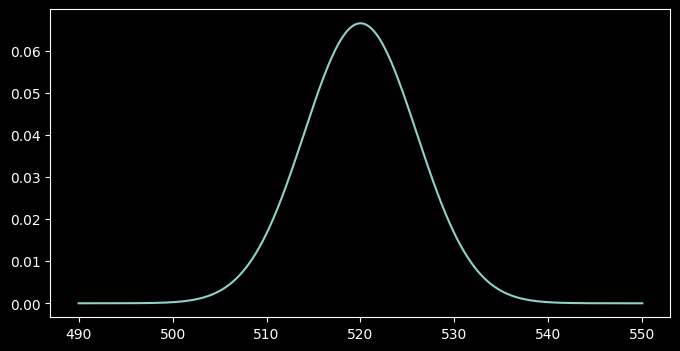

In [38]:
# Create a figure with a larger size
fig, ax = plt.subplots(figsize=(8, 4))
# Plot the normal distribution pdf as a line
ax.plot(x, y)

In [39]:
# Add a vertical line for the lower specification limit
ax.axvline(lower_limit, color='r', linestyle='--')

# Add a vertical line for the upper specification limit
ax.axvline(upper_limit, color='r', linestyle='--')

# Add a title and labels for the axes
title_text = "Normal Distribution with \u03c3 = %d" % sigma
ax.set_title(title_text)
ax.set_xlabel('Measurement (µm)')
ax.set_ylabel('Probability Density')

Text(4.444444444444452, 0.5, 'Probability Density')

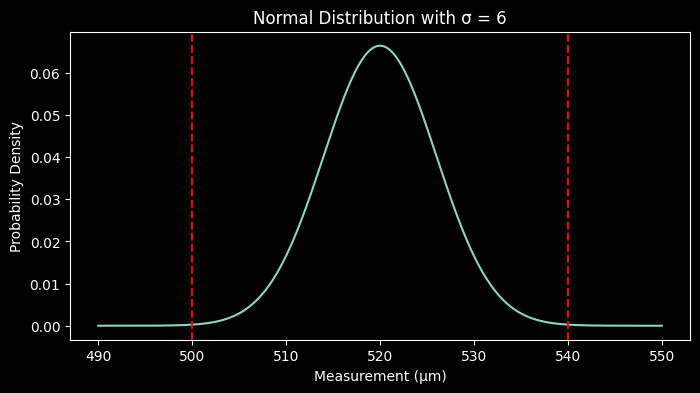

In [40]:
# Show the modified plot
fig
#Some prefer the solution below
#display(fig)

### Normal distribution table
Since Φ cannot be traced back to an elementary primitive function, tables were usually used for the calculation in the past (see standard normal distribution table).

https://en.wikipedia.org/wiki/Standard_normal_table

Today you can use the CDF function.

In [41]:
cdf_lower = norm.cdf(lower_limit, mean, sigma)
cdf_upper = norm.cdf(upper_limit, mean, sigma)

Probability that a value is grater than USL: p(x > USL) = 1 - Φ(USL)

Probability that a value is less than LSL: p(x < LSL) = Φ(LSL)

In [42]:
# Calculate the probability of a value being outside the specification limits
prob_outside_limits = (1 - cdf_upper) + cdf_lower
prob_textstr = 'Probabilty of value being outside the specification limits: {:.2f}%'.format(prob_outside_limits*100)
print(prob_textstr)

Probabilty of value being outside the specification limits: 0.09%


In [43]:
# Calculate Cp
Cp = (upper_limit-lower_limit)/(6*sigma)
Cp_text = 'Cp = {:.2f}'.format(Cp)
print(Cp_text) 

Cp = 1.11


In [44]:
# Calculate how many parts per million are scrap or rework
PPM = prob_outside_limits * 1000000
PPM_text = 'On 1 million parts scrap or rework: %d' % (PPM)
print(PPM_text)

On 1 million parts scrap or rework: 858
